# Parabilic SAR AF パラメータと EPLosscutのスクリーニング・チェック

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)

In [15]:
def plot(df, date_target, code):
    FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
    fm.fontManager.addfont(FONT_PATH)
    
    # FontPropertiesオブジェクト生成（名前の取得のため）
    font_prop = fm.FontProperties(fname=FONT_PATH)
    font_prop.get_name()
    
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.size'] = 16
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    
    x = df['af_step']
    n = len(df.columns)
    list_losscut = df.columns[n-4:n]
    for losscut in list_losscut:
        y = df[losscut]
        if type(losscut) is str:
            label_str = 'LossCut = none'
        else:
            label_str = 'LossCut Factor = %d' % losscut
        ax.plot(x, y, lw=1, label=label_str)
    
    ax.axhline(0, color='black', lw=0.5)
    ax.set_xscale('log')
    ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
    ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)
    
    ax.set_xlabel('AF step')
    ax.set_ylabel('Profit (JPY)')
    
    ax.legend(fontsize=9)
    ax.set_title('tick data on %s with AF[init] = 0 and AF[max] = AF[step]x10' % date_target, fontsize=10)
    
    plt.suptitle('%s : AF dependency in Parabolic SAR' % code, fontsize=16)
    plt.savefig('./study_203_AF_EPLossCut/%s_%s.png' % (date_target, code))
    plt.show()

In [16]:
date_target = '2025-04-04'
path_base = '../doe/results_Simple_SAR_EPLossCut'

## 三菱重工業 (7011)

     #  af_init  af_step   af_max   none      2      5     10
0    1        0  0.00001  0.00010  16100  16100  16100  16100
1    2        0  0.00002  0.00020  18400  18400  18400  18400
2    3        0  0.00003  0.00030  20800  18300  18350  17500
3    4        0  0.00005  0.00050  25700  20650  25700  25700
4    5        0  0.00007  0.00075  18300  17000  21500  19200
5    6        0  0.00010  0.00100   8900  12450  10950   7100
6    7        0  0.00020  0.00200  16400  11000  15450  17400
7    8        0  0.00030  0.00300  15700  11000  15500  15700
8    9        0  0.00050  0.00500  17200  15900  20800  17200
9   10        0  0.00075  0.00750  25500  17600  26150  25700
10  11        0  0.00100  0.01000  14300   9550   9650  14300
11  12        0  0.00200  0.02000  15100  12000  11700  15100
12  13        0  0.00300  0.03000  15600  15650  15550  15600
13  14        0  0.00500  0.05000  17900  16000  17950  17900
14  15        0  0.00750  0.07500  15300  15650  15300  15300
15  16  

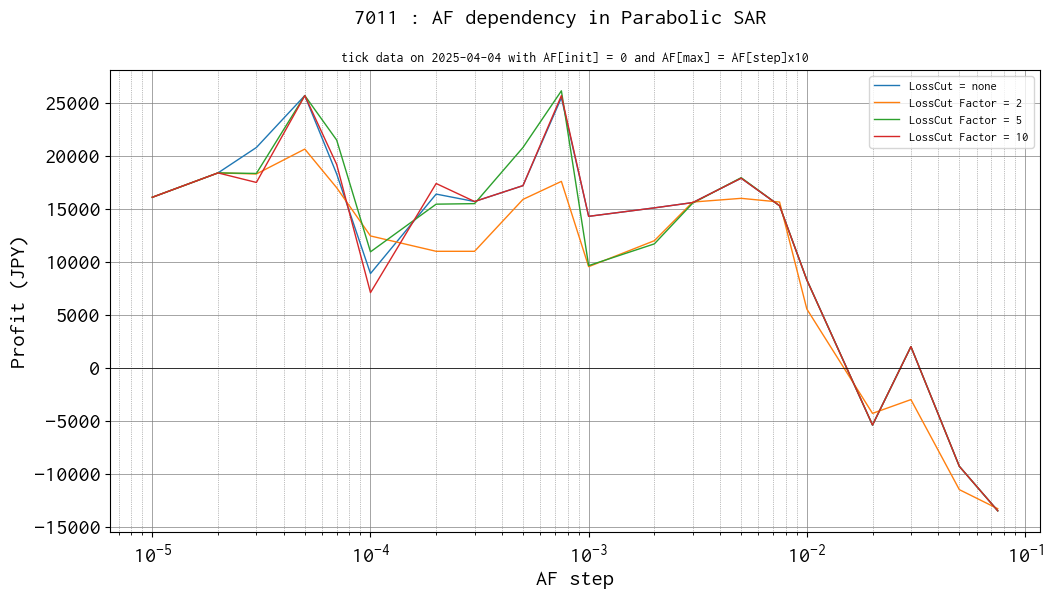

In [17]:
code = '7011'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)

## トヨタ自動車 (7203)

     #  af_init  af_step   af_max   none      2      5     10
0    1        0  0.00001  0.00010   5400   5400   5400   5400
1    2        0  0.00002  0.00020   8900   5600   6000   8900
2    3        0  0.00003  0.00030  11500   7000   6700   5950
3    4        0  0.00005  0.00050   1200   2500   1450   -650
4    5        0  0.00007  0.00075   8000   6400   6000   4300
5    6        0  0.00010  0.00100   5700   5750   4200   7250
6    7        0  0.00020  0.00200   7100   4200   5550   7650
7    8        0  0.00030  0.00300   5900    950   4550   6650
8    9        0  0.00050  0.00500   2100   3650   2000   2650
9   10        0  0.00075  0.00750   7700   6700   9500   8250
10  11        0  0.00100  0.01000  17200  12250  17950  17750
11  12        0  0.00200  0.02000   5100   6550   6150   5650
12  13        0  0.00300  0.03000  10100  11900  10700  10650
13  14        0  0.00500  0.05000   8200   8250   8250   8200
14  15        0  0.00750  0.07500   8800   8900   8850   8800
15  16  

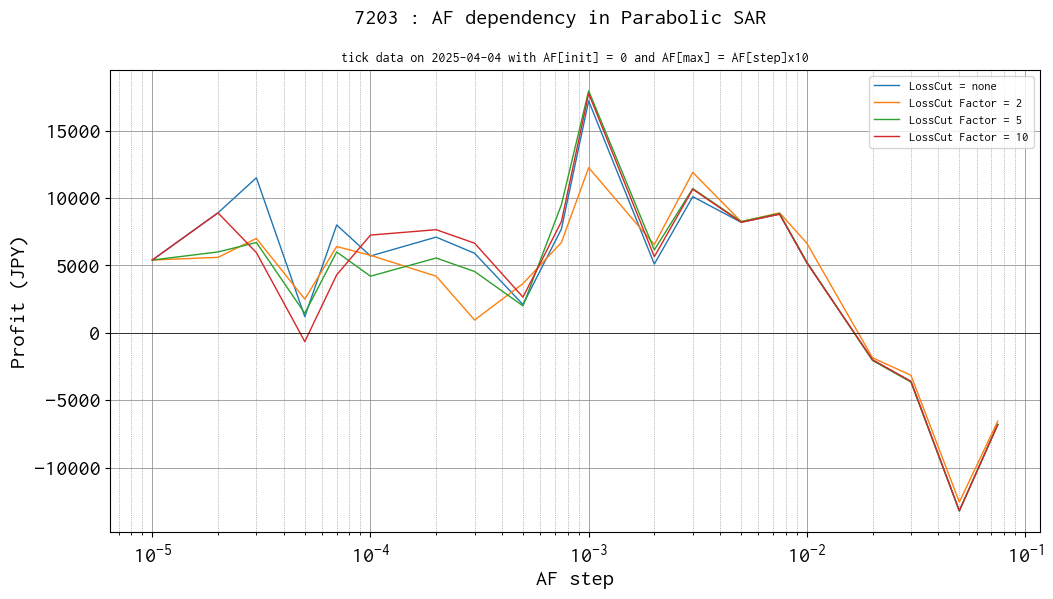

In [18]:
code = '7203'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)

## 三菱ＵＦＪフィナンシャルＧ (8306)

     #  af_init  af_step   af_max   none      2      5     10
0    1        0  0.00001  0.00010   3150   3500   3500   3500
1    2        0  0.00002  0.00020   7650   4350   4350   7950
2    3        0  0.00003  0.00030  10450  10750  10750  10750
3    4        0  0.00005  0.00050  12750  13050  13050  13050
4    5        0  0.00007  0.00075   7950   2150   7850   8850
5    6        0  0.00010  0.00100   5750   2300   6650   5850
6    7        0  0.00020  0.00200   8450    300   9900   8450
7    8        0  0.00030  0.00300   9250   4200   9500   9250
8    9        0  0.00050  0.00500   6850   6650   6850   6850
9   10        0  0.00075  0.00750   6750   6250   7350   6750
10  11        0  0.00100  0.01000   9850   8350   9850   9850
11  12        0  0.00200  0.02000  10850  13300  10850  10850
12  13        0  0.00300  0.03000   8750  10700   8750   8750
13  14        0  0.00500  0.05000   6650  10150   6650   6650
14  15        0  0.00750  0.07500  11750  11900  11750  11750
15  16  

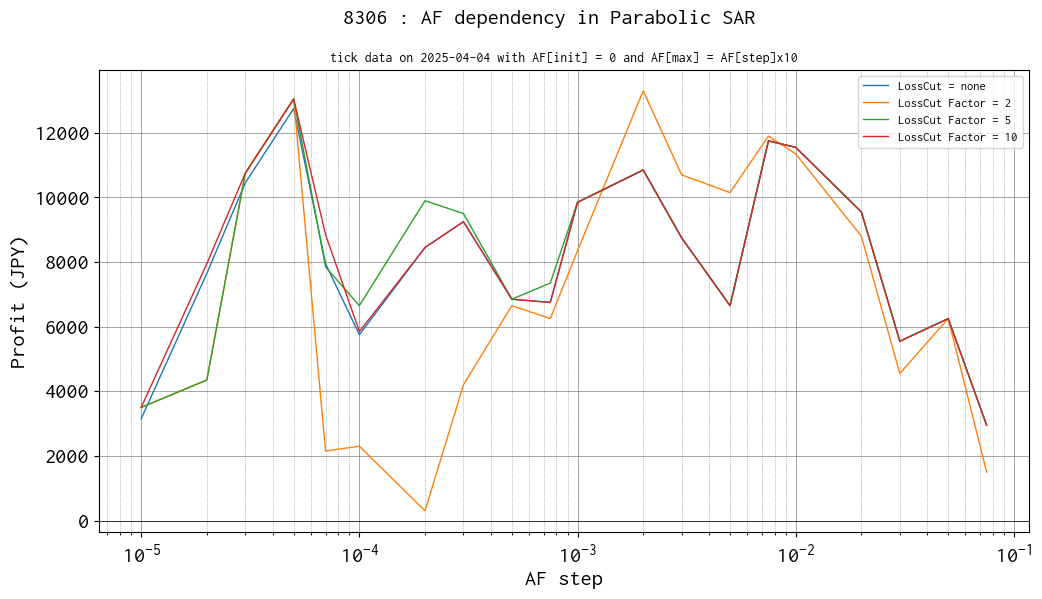

In [19]:
code = '8306'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)